In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
data.shape

(442, 10)

In [5]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,label, test_size=0.2, random_state=2024)

In [7]:
# 혈당 수치
sim_lr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

LinearRegression()

In [8]:
y_pred = sim_lr.predict(X_test['s6'].values.reshape((-1,1)))

In [9]:
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2 : {:.2f}'.format(r2_score(y_test,y_pred)))
print('단순 선형 회귀 계수(w) : {:.2f}, 절편(b) : {:.4f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

단순 선형 회귀, R2 : 0.15
단순 선형 회귀 계수(w) : 620.00, 절편(b) : 152.1793


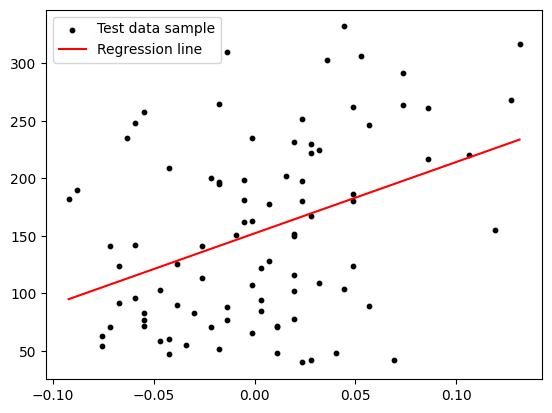

In [10]:
#linear line의 생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = sim_lr.predict(line_x.reshape((-1,1)))

#Test data를 표현 
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample','Regression line'])

In [11]:
# Multiple Linear Regression 
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)

In [12]:
print('다중 선형 회귀, R2 : {:.2f}'.format(r2_score(y_test,y_pred)))

다중 선형 회귀, R2 : 0.49


In [13]:
# Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [14]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)),y_train)

DecisionTreeRegressor(max_depth=5)

In [15]:
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

In [16]:
print("단순 결정 트리 회귀 R2 : {:.2f}".format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2 : 0.15


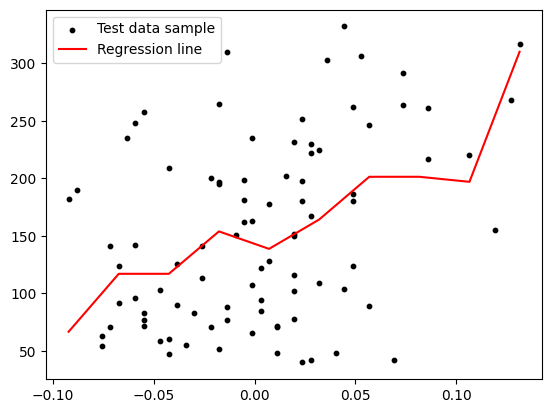

In [17]:
#linear line의 생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))

#Test data를 표현 
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample','Regression line'])

In [18]:
# Multiple Decision Tree Regression 
mul_dt = DecisionTreeRegressor(max_depth=5, random_state=2023)
mul_dt.fit(X_train, y_train)
y_pred = mul_dt.predict(X_test)

In [19]:
print('Decision Tree Regressor R2 : {:.2f}'.format(r2_score(y_test,y_pred)))

Decision Tree Regressor R2 : 0.33


In [20]:
# Support Vector Machine Regressor
from sklearn.svm import SVR
svm_regr = SVR()
svm_regr.fit(X_train['s6'].values.reshape((-1,1)), y_train)
y_pred = svm_regr.predict(X_test['s6'].values.reshape((-1,1)))
print("단순 서포트 벡터 머신 회귀 R2 : {:.2f}".format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2 : 0.07


In [21]:
best_model_depth = 0
best_model_accuracy = 0

for i in range(1,21) : 
  svm_regr = SVR(C=i)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print("다중 서포트 벡터 머신 회귀 C : {}, R2 : {:.2f}".format(i, r2))

  if best_model_accuracy < r2:
    best_model_depth = i
    best_model_accuracy = r2

print('-------------------------------')
print('best_model_depth={0}, best_model_accuracy={1}'.format(best_model_depth, best_model_accuracy))

다중 서포트 벡터 머신 회귀 C : 1, R2 : 0.16
다중 서포트 벡터 머신 회귀 C : 2, R2 : 0.29
다중 서포트 벡터 머신 회귀 C : 3, R2 : 0.36
다중 서포트 벡터 머신 회귀 C : 4, R2 : 0.42
다중 서포트 벡터 머신 회귀 C : 5, R2 : 0.45
다중 서포트 벡터 머신 회귀 C : 6, R2 : 0.47
다중 서포트 벡터 머신 회귀 C : 7, R2 : 0.49
다중 서포트 벡터 머신 회귀 C : 8, R2 : 0.50
다중 서포트 벡터 머신 회귀 C : 9, R2 : 0.50
다중 서포트 벡터 머신 회귀 C : 10, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 11, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 12, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 13, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 14, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 15, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 16, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 17, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 18, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 19, R2 : 0.51
다중 서포트 벡터 머신 회귀 C : 20, R2 : 0.51
-------------------------------
best_model_depth=15, best_model_accuracy=0.5097098862931053


In [22]:
# Multi Layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=200, max_iter=1000)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print("다중 MLP 회귀 R2 : {:.2f}".format(r2_score(y_test,y_pred)))

다중 MLP 회귀 R2 : 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
